##### Set Up

In [1]:
## imports and dependencies 

# standard libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.neighbors import KNeighborsRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling 
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

##### Data

In [2]:
df = pd.read_csv("tar_enc_dataset.csv")

In [3]:
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

##### Models

In [8]:
# model
lst = []

for i in range(1, int(len(df)**(1/2))):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)

    lst.append(mae)

    print("K used", i)
    print("Mean Absolute Error:", mae)
    print("")

K used 1
Mean Absolute Error: 0.6569715453222352

K used 2
Mean Absolute Error: 0.5858376052860176

K used 3
Mean Absolute Error: 0.543670707574362

K used 4
Mean Absolute Error: 0.5529644213358039

K used 5
Mean Absolute Error: 0.5306068695022153

K used 6
Mean Absolute Error: 0.5283473517931712

K used 7
Mean Absolute Error: 0.5266126666420213

K used 8
Mean Absolute Error: 0.5311159249278731

K used 9
Mean Absolute Error: 0.544140291311854

K used 10
Mean Absolute Error: 0.5456188119474189

K used 11
Mean Absolute Error: 0.5478486236447296

K used 12
Mean Absolute Error: 0.545663414826984

K used 13
Mean Absolute Error: 0.5500059097388169

K used 14
Mean Absolute Error: 0.5523663428989557

K used 15
Mean Absolute Error: 0.5534921773416555

K used 16
Mean Absolute Error: 0.5507708933911557

K used 17
Mean Absolute Error: 0.5513676360900481

K used 18
Mean Absolute Error: 0.5491609227558517

K used 19
Mean Absolute Error: 0.5482016794688055

K used 20
Mean Absolute Error: 0.5485000051

In [9]:
# KNN Scaled
KNN_scaled = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
KNN_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = KNN_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.5266126666420213


In [10]:
# KNN PCA
KNN_pca = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
KNN_pca.fit(x_train_pca, y_train)
y_pred_pca = KNN_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.552932488315131


In [11]:
lst.index(min(lst))

6

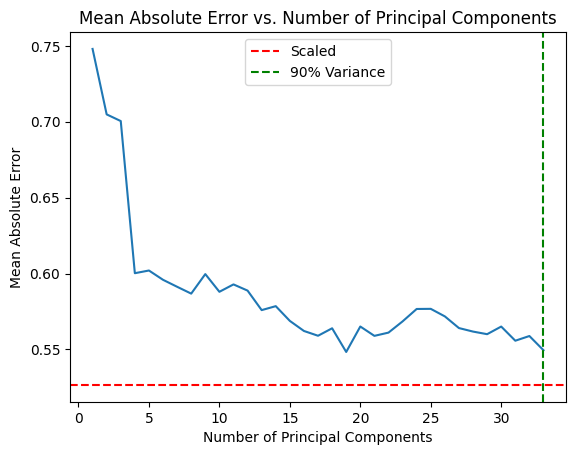

In [12]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    KNN = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
    KNN.fit(x_train_pca, y_train)
    y_pred = KNN.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [13]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(19, 0.548326441512314)

In [14]:
mae_values

[0.7479817067378141,
 0.7048481109281622,
 0.7004552031754864,
 0.6002178519543864,
 0.6019932876689165,
 0.595861774537744,
 0.5912734242773254,
 0.5867661081612354,
 0.5996308533670606,
 0.5879671364818134,
 0.5928339630523419,
 0.5887506135379215,
 0.5758977573514941,
 0.5785080283500066,
 0.5687900257830208,
 0.5621590271970157,
 0.5590076013107,
 0.5639227535934173,
 0.548326441512314,
 0.5650958195706074,
 0.5589364143366853,
 0.561075086296962,
 0.5684645421653134,
 0.5766525473065228,
 0.5767321305786942,
 0.571767127359127,
 0.5640731692231793,
 0.5617557461689945,
 0.5600410637201849,
 0.5650637077202,
 0.5557353980277554,
 0.5588287657470471,
 0.5494653226080564]